# Simple J profiling

In [5]:
import numpy as np
from scipy.special import gamma
import matplotlib as mpl
import matplotlib.pyplot as plt
# import LL_inten_to_xsec as Litx
from tqdm import *
import pandas as pd

%matplotlib inline

## Super simple

To start with let's assume we have 2 energy bins, one with 50 counts, one with 100. Assume perfect background.

Can check with a lower nmc don't always get good data Asimov agreement, with higher do.

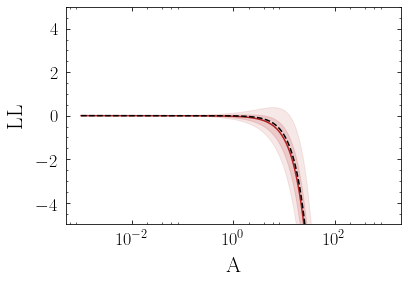

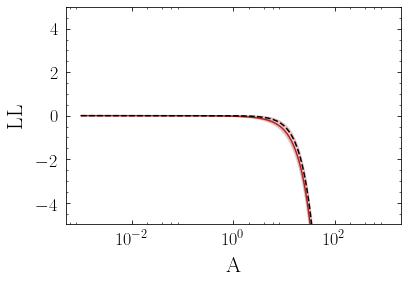

In [4]:
# Test with small number of MC

nmc = 5
bkg1 = 50
bkg2 = 100
A_ary = 10**np.linspace(-3,3,200)

bin1_arr = np.zeros((nmc,len(A_ary)))
bin2_arr = np.zeros((nmc,len(A_ary)))

# Create arrays
for imc in range(nmc):
    data1 = np.random.poisson(bkg1)
    data2 = np.random.poisson(bkg2)
    
    for iA in range(len(A_ary)):
        bin1_arr[imc,iA] = -bkg1-A_ary[iA] + data1*np.log(bkg1+A_ary[iA])-np.log(gamma(data1+1))
        bin2_arr[imc,iA] = -bkg2-A_ary[iA] + data2*np.log(bkg2+A_ary[iA])-np.log(gamma(data2+1))
    
    bin1_arr[imc] -= bin1_arr[imc][0]
    bin2_arr[imc] -= bin2_arr[imc][0]

# Calculate the Asimov
bin1_Asimov = np.zeros(len(A_ary))
bin2_Asimov = np.zeros(len(A_ary))

for iA in range(len(A_ary)):
    bin1_Asimov[iA] = -bkg1-A_ary[iA] + bkg1*np.log(bkg1+A_ary[iA])-np.log(gamma(bkg1+1))
    bin2_Asimov[iA] = -bkg2-A_ary[iA] + bkg2*np.log(bkg2+A_ary[iA])-np.log(gamma(bkg2+1))

bin1_Asimov -= bin1_Asimov[0]
bin2_Asimov -= bin2_Asimov[0]
    
# Plot arrays
plt.fill_between(A_ary,np.percentile(bin1_arr,2.5,axis=0),np.percentile(bin1_arr,97.5,axis=0),color='firebrick',alpha=0.1)
plt.fill_between(A_ary,np.percentile(bin1_arr,16,axis=0),np.percentile(bin1_arr,84,axis=0),color='firebrick',alpha=0.15)
plt.plot(A_ary,np.percentile(bin1_arr,50,axis=0),color='firebrick')
plt.plot(A_ary,bin1_Asimov,color='black',linestyle='--')
plt.ylabel("LL")
plt.xlabel("A")
plt.xscale("log")
plt.ylim(-5,5)
plt.show()

plt.fill_between(A_ary,np.percentile(bin2_arr,2.5,axis=0),np.percentile(bin2_arr,97.5,axis=0),color='firebrick',alpha=0.1)
plt.fill_between(A_ary,np.percentile(bin2_arr,16,axis=0),np.percentile(bin2_arr,84,axis=0),color='firebrick',alpha=0.15)
plt.plot(A_ary,np.percentile(bin2_arr,50,axis=0),color='firebrick')
plt.plot(A_ary,bin2_Asimov,color='black',linestyle='--')
plt.ylabel("LL")
plt.xlabel("A")
plt.xscale("log")
plt.ylim(-5,5)
plt.show()

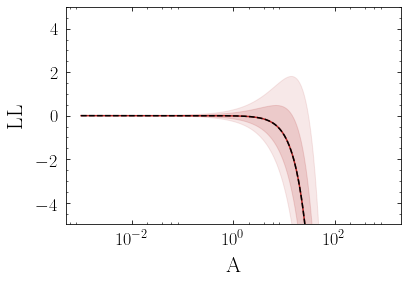

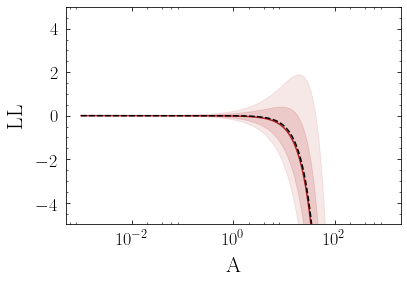

In [5]:
# With more MC get good agreement

nmc = 1000
bkg1 = 50
bkg2 = 100
A_ary = 10**np.linspace(-3,3,200)

bin1_arr = np.zeros((nmc,len(A_ary)))
bin2_arr = np.zeros((nmc,len(A_ary)))

# Create arrays
for imc in range(nmc):
    data1 = np.random.poisson(bkg1)
    data2 = np.random.poisson(bkg2)
    
    for iA in range(len(A_ary)):
        bin1_arr[imc,iA] = -bkg1-A_ary[iA] + data1*np.log(bkg1+A_ary[iA])-np.log(gamma(data1+1))
        bin2_arr[imc,iA] = -bkg2-A_ary[iA] + data2*np.log(bkg2+A_ary[iA])-np.log(gamma(data2+1))
    
    bin1_arr[imc] -= bin1_arr[imc][0]
    bin2_arr[imc] -= bin2_arr[imc][0]

# Calculate the Asimov
bin1_Asimov = np.zeros(len(A_ary))
bin2_Asimov = np.zeros(len(A_ary))

for iA in range(len(A_ary)):
    bin1_Asimov[iA] = -bkg1-A_ary[iA] + bkg1*np.log(bkg1+A_ary[iA])-np.log(gamma(bkg1+1))
    bin2_Asimov[iA] = -bkg2-A_ary[iA] + bkg2*np.log(bkg2+A_ary[iA])-np.log(gamma(bkg2+1))

bin1_Asimov -= bin1_Asimov[0]
bin2_Asimov -= bin2_Asimov[0]
    
# Plot arrays
plt.fill_between(A_ary,np.percentile(bin1_arr,2.5,axis=0),np.percentile(bin1_arr,97.5,axis=0),color='firebrick',alpha=0.1)
plt.fill_between(A_ary,np.percentile(bin1_arr,16,axis=0),np.percentile(bin1_arr,84,axis=0),color='firebrick',alpha=0.15)
plt.plot(A_ary,np.percentile(bin1_arr,50,axis=0),color='firebrick')
plt.plot(A_ary,bin1_Asimov,color='black',linestyle='--')
plt.ylabel("LL")
plt.xlabel("A")
plt.xscale("log")
plt.ylim(-5,5)
plt.show()

plt.fill_between(A_ary,np.percentile(bin2_arr,2.5,axis=0),np.percentile(bin2_arr,97.5,axis=0),color='firebrick',alpha=0.1)
plt.fill_between(A_ary,np.percentile(bin2_arr,16,axis=0),np.percentile(bin2_arr,84,axis=0),color='firebrick',alpha=0.15)
plt.plot(A_ary,np.percentile(bin2_arr,50,axis=0),color='firebrick')
plt.plot(A_ary,bin2_Asimov,color='black',linestyle='--')
plt.ylabel("LL")
plt.xlabel("A")
plt.xscale("log")
plt.ylim(-5,5)
plt.show()

Now combine using `LL_inten_to_xsec.pyx`. Let's pretend we have 3 halos with J-factors between 1 and 100 in counts and say it splits evenly between the bins.

## Manual intensity LLs and J-factor profiling

In [ ]:
nobj=2
log10Jvals = np.linspace(0,1,nobj)
Log10Jerrs = 0.1
PPnoxsec = np.array([0.5,0.5])

nmc = 5
bkg1 = 50
bkg2 = 100
A_ary = 10**np.linspace(-6,6,200)

LL_ebin_arr = np.zeros((2,nmc,len(A_ary)))

# Create arrays
for imc in range(nmc):
    data1 = np.random.poisson(bkg1)
    data2 = np.random.poisson(bkg2)
    
    for iA in range(len(A_ary)):
        LL_ebin_arr[0,imc,iA] = -bkg1-A_ary[iA] + data1*np.log(bkg1+A_ary[iA])-np.log(gamma(data1+1))
        LL_ebin_arr[1,imc,iA] = -bkg2-A_ary[iA] + data2*np.log(bkg2+A_ary[iA])-np.log(gamma(data2+1))
    
# Calculate the Asimov
LL_ebin_Asimov = np.zeros((2,len(A_ary)))

for iA in range(len(A_ary)):
    LL_ebin_Asimov[0,iA] = -bkg1-A_ary[iA] + bkg1*np.log(bkg1+A_ary[iA])-np.log(gamma(bkg1+1))
    LL_ebin_Asimov[1,iA] = -bkg2-A_ary[iA] + bkg2*np.log(bkg2+A_ary[iA])-np.log(gamma(bkg2+1))
    
# Now profile over J

LL2 = np.zeros((nobj,nmc,len(A_ary)))
LL2_Asimov = np.zeros((nobj,len(A_ary)))

for iobj in range(nobj):
    J_proflike = np.linspace(log10Jvals[iobj]-3*Log10Jerrs,log10Jvals[iobj]+3*Log10Jerrs,700)
    
    for iA in range(len(A_ary)):
        LL_proflike = np.zeros(len(J_proflike))
        for Ji in range(len(J_proflike)):
            # Loop over J-factors
            for ei in range(2):
                # Loop over energy bins
                min_int = A_ary[0]
                max_int = A_ary[-1]
                intval = PPnoxsec[ei]*A_ary[iA]*pow(10.,J_proflike[Ji])
        
                if intval <= min_int:
                    # Add minimum value
                    LL_proflike[Ji] += LL_ebin_Asimov[ei,0]
                elif intval >= max_int:
                    # Add maximum value
                    LL_proflike[Ji] += LL_ebin_Asimov[ei,-1]
                else:
                    # Determine the value from interpolation
                    LL_proflike[Ji] += np.interp(intval,A_ary, LL_ebin_Asimov[ei])

            # Add the J-factor weighting term as a log normal
            LL_proflike[Ji] += -pow(J_proflike[Ji]-log10Jvals[iobj],2.)/(2*pow(Log10Jerrs,2.)) \
                            - np.log( np.sqrt(2*np.pi)*Log10Jerrs*pow(10.,J_proflike[Ji])*np.log(10) )

        # Now find the maximum LL from this list, as that's the profile likelihood method
        LL2_Asimov[iobj,iA] = 2*np.max(LL_proflike) # 2x because for TS
    
    LL2_Asimov[iobj] -= LL2_Asimov[iobj,0]

for imc in range(nmc):
    for iobj in range(nobj):
        J_proflike = np.linspace(log10Jvals[iobj]-3*Log10Jerrs,log10Jvals[iobj]+3*Log10Jerrs,700)

        for iA in range(len(A_ary)):
            LL_proflike = np.zeros(len(J_proflike))
            for Ji in range(len(J_proflike)):
                # Loop over J-factors
                for ei in range(2):
                    # Loop over energy bins
                    min_int = A_ary[0]
                    max_int = A_ary[-1]
                    intval = PPnoxsec[ei]*A_ary[iA]*pow(10.,J_proflike[Ji])

                    if intval <= min_int:
                        # Add minimum value
                        LL_proflike[Ji] += LL_ebin_arr[ei,imc,0]
                    elif intval >= max_int:
                        # Add maximum value
                        LL_proflike[Ji] += LL_ebin_arr[ei,imc,-1]
                    else:
                        # Determine the value from interpolation
                        LL_proflike[Ji] += np.interp(intval,A_ary, LL_ebin_arr[ei,imc])

                # Add the J-factor weighting term as a log normal
                LL_proflike[Ji] += -pow(J_proflike[Ji]-log10Jvals[iobj],2.)/(2*pow(Log10Jerrs,2.)) \
                                - np.log( np.sqrt(2*np.pi)*Log10Jerrs*pow(10.,J_proflike[Ji])*np.log(10) )

            # Now find the maximum LL from this list, as that's the profile likelihood method
            LL2[iobj,imc,iA] = 2*np.max(LL_proflike) # 2x because for TS
    
        LL2[iobj,imc] -= LL2[iobj,imc,0]

for iobj in range(nobj):
    plt.fill_between(A_ary,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
    plt.fill_between(A_ary,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
    plt.plot(A_ary,np.percentile(LL2[iobj],50,axis=0),color='firebrick')
    plt.plot(A_ary,LL2_Asimov[iobj],color='black',linestyle='--')
    plt.ylabel("TS")
    plt.xlabel("A")
    plt.xscale("log")
    plt.ylim(-5,5)
    plt.show()

## Manual intensity LLs, passed through J-factor profiling

In [ ]:
nobj=5
log10Jvals = np.linspace(0,1,nobj)
Log10Jerrs = 0.4
PPnoxsec = np.array([0.5,0.5])

nmc = 200
bkg1 = 50
bkg2 = 100
A_ary = 10**np.linspace(-6,6,200)

bin1_arr = np.zeros((nmc,len(A_ary)))
bin2_arr = np.zeros((nmc,len(A_ary)))

# Create arrays
for imc in range(nmc):
    data1 = np.random.poisson(bkg1)
    data2 = np.random.poisson(bkg2)
    
    for iA in range(len(A_ary)):
        bin1_arr[imc,iA] = -bkg1-A_ary[iA] + data1*np.log(bkg1+A_ary[iA])-np.log(gamma(data1+1))
        bin2_arr[imc,iA] = -bkg2-A_ary[iA] + data2*np.log(bkg2+A_ary[iA])-np.log(gamma(data2+1))
    
# Calculate the Asimov
bin1_Asimov = np.zeros(len(A_ary))
bin2_Asimov = np.zeros(len(A_ary))

for iA in range(len(A_ary)):
    bin1_Asimov[iA] = -bkg1-A_ary[iA] + bkg1*np.log(bkg1+A_ary[iA])-np.log(gamma(bkg1+1))
    bin2_Asimov[iA] = -bkg2-A_ary[iA] + bkg2*np.log(bkg2+A_ary[iA])-np.log(gamma(bkg2+1))
    
# Now profile over J

LL2 = np.zeros((nobj,nmc,len(A_ary)))
LL2_Asimov = np.zeros((nobj,len(A_ary)))

for iobj in tqdm(range(nobj)):
    LL2_Asimov[iobj] = Litx.construct_xsec_LL(A_ary,np.array([0.0,1.0]),PPnoxsec,np.array([bin1_Asimov,bin2_Asimov]),np.array([A_ary,A_ary]),log10Jvals[iobj],Log10Jerrs)
    LL2_Asimov[iobj] -= LL2_Asimov[iobj,0]
    for imc in range(nmc):
        LL2[iobj,imc] = Litx.construct_xsec_LL(A_ary,np.array([0.0,1.0]),PPnoxsec,np.array([bin1_arr[imc],bin2_arr[imc]]),np.array([A_ary,A_ary]),log10Jvals[iobj],Log10Jerrs)
        LL2[iobj,imc] -= LL2[iobj,imc,0]

for iobj in range(nobj):
    plt.fill_between(A_ary,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
    plt.fill_between(A_ary,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
    plt.plot(A_ary,np.percentile(LL2[iobj],50,axis=0),color='firebrick')
    plt.plot(A_ary,LL2_Asimov[iobj],color='black',linestyle='--')
    plt.ylabel("LL")
    plt.xlabel("A")
    plt.xscale("log")
    plt.ylim(-5,5)
    plt.show()

## Intensity LLs

In [6]:
catalog_file = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/data/Catalogs/DarkSky_ALL_200,200,200_v3.csv'
catalog = pd.read_csv(catalog_file)

16it [03:28, 13.20s/it]


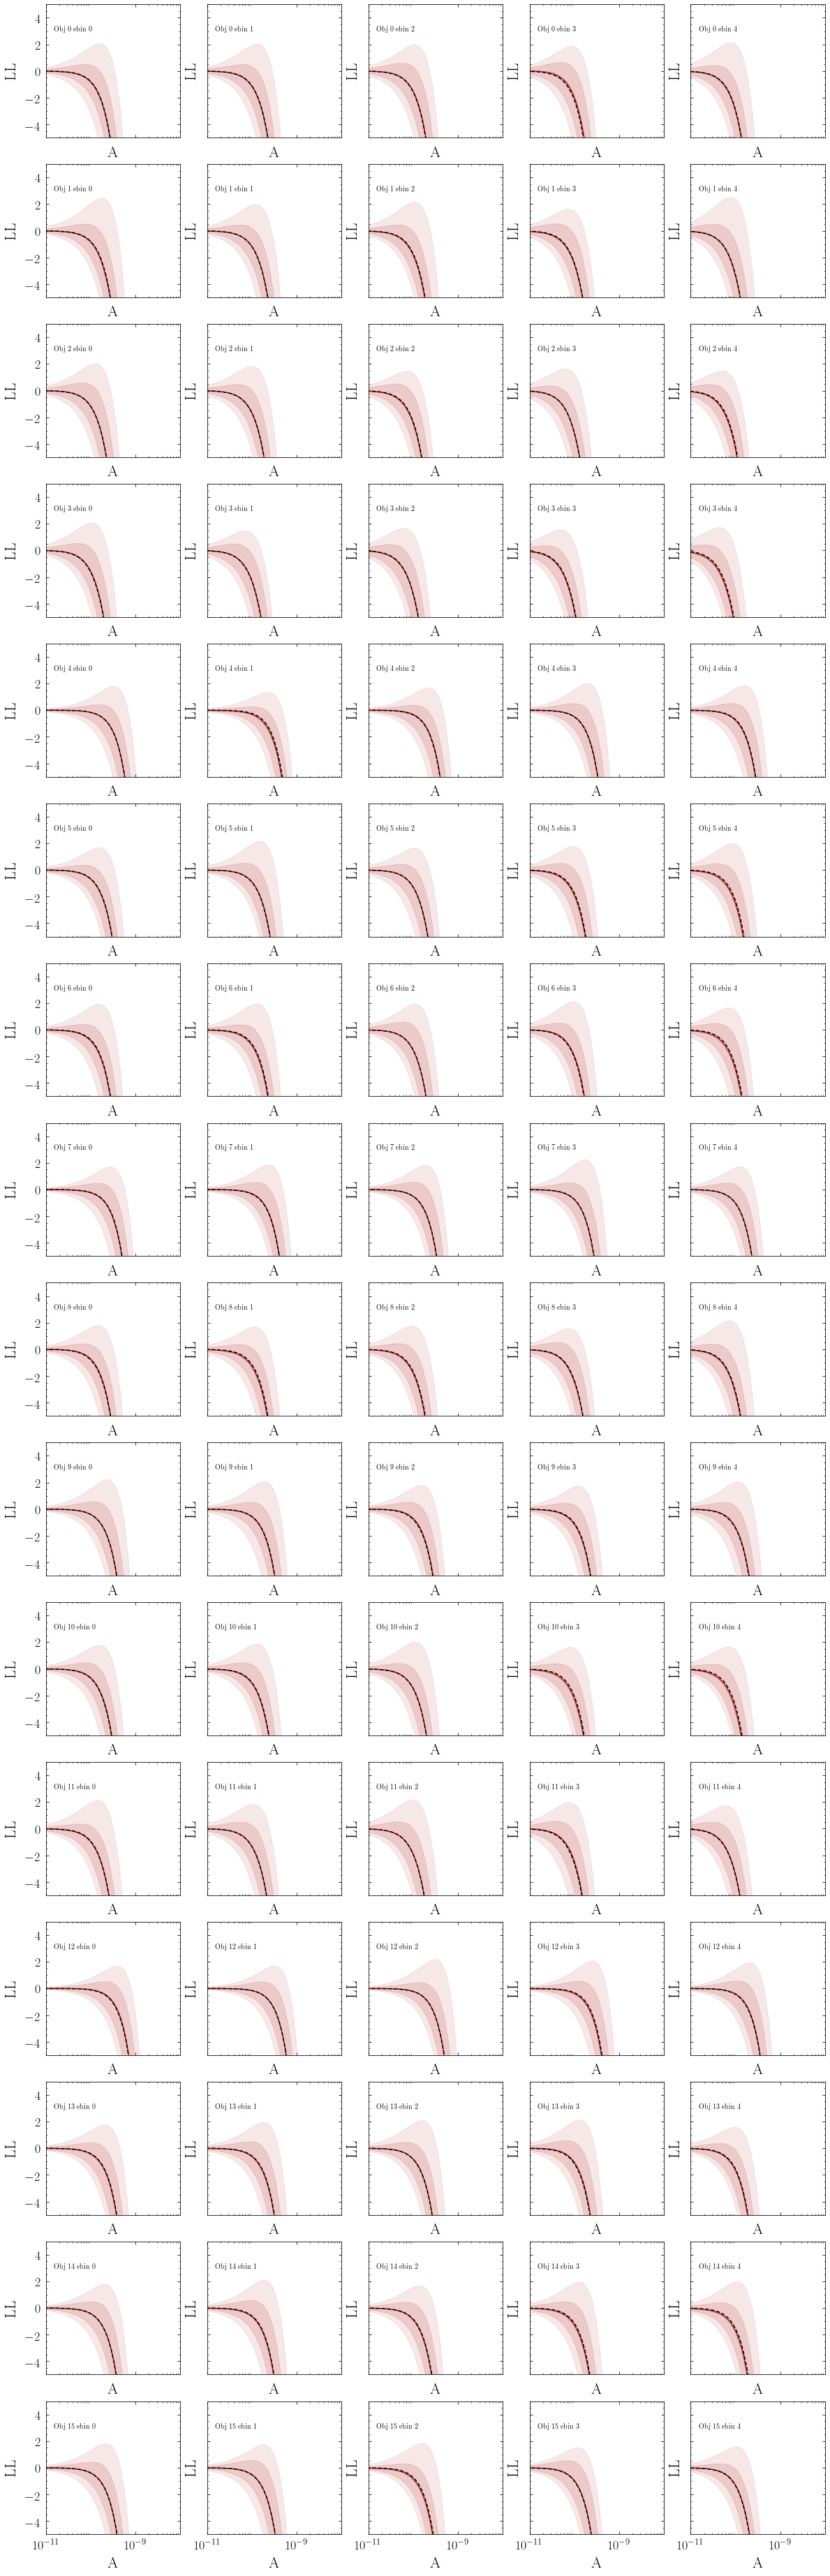

In [59]:
ncols=5
nrows=16
nmc = 500

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.5,100/1.5))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i
        iebin = j
        LL2 = np.zeros((nmc, 200))
        for imc in range(nmc):
            LL2[imc] = np.load("data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL'][iebin]
            inten = np.load("data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['intens'][iebin]
            LL2[imc]-= LL2[imc][0]
        LL2_Asimov = np.load("data/old/Asimov////LL_inten_o"+str(iobj)+"_Asimov.npz")['LL'][iebin]
        LL2_Asimov -= LL2_Asimov[0]
        
        cell.fill_between(inten,np.percentile(LL2,2.5,axis=0),np.percentile(LL2,97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(inten,np.percentile(LL2,16,axis=0),np.percentile(LL2,84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(inten,np.percentile(LL2,50,axis=0),color='firebrick')
        cell.plot(inten,LL2_Asimov,color='black',linestyle='--')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.set_xlim(1e-11,1e-8)
        cell.text(1.5e-11,3, "Obj " + str(iobj) + ", ebin " + str(iebin))
        cell.set_ylim(-5,5)



## Pipe intensity LLs through J-factor profiling

100%|██████████| 16/16 [32:33<00:00, 126.95s/it]
4it [00:00, 14.34it/s]


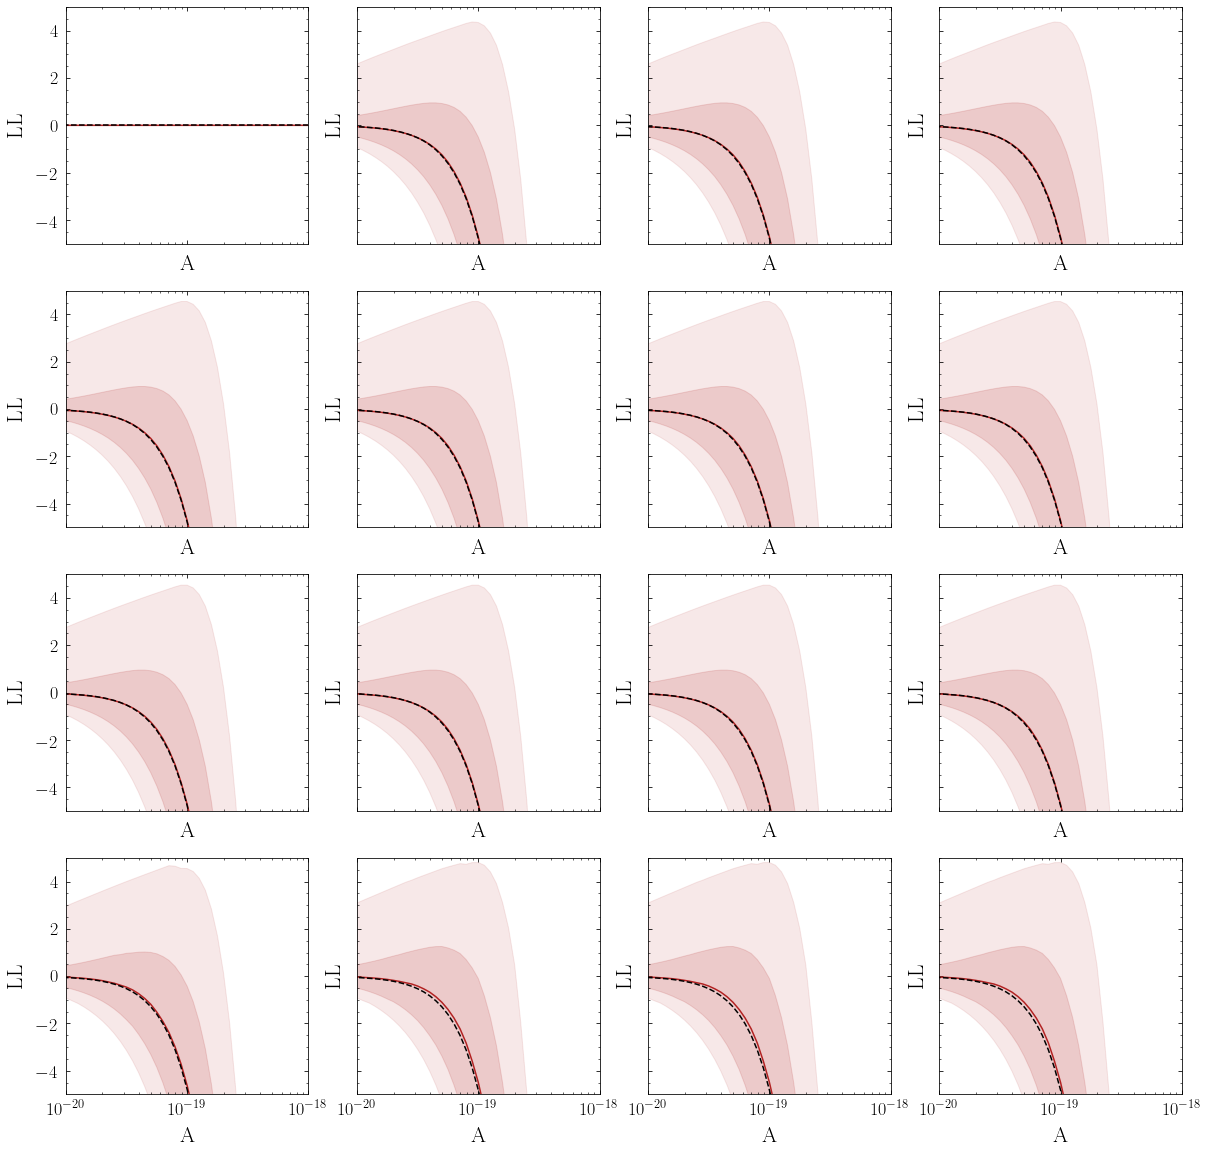

In [71]:
nobj=16
nebins = 5
log10Jvals = catalog.mulog10J_inf.values[:nobj]
Log10Jerrs = catalog.siglog10J_inf.values[:nobj]
PPnoxsec = np.load("../AdditionalData/PPnoxsec_b_ary.npy")[0,:nebins]

nmc = 500
xsecs = np.logspace(-33,-18,301)

LL2 = np.zeros((nobj,nmc,len(xsecs)))
LL2_Asimov = np.zeros((nobj,len(xsecs)))

for iobj in tqdm(range(nobj)):
    # Cumulative 
    # J-factor errors time ten!
    LL2_Asimov[iobj] = LL2_Asimov[iobj-1] + Litx.construct_xsec_LL(xsecs,np.arange(nebins, dtype=np.float64),PPnoxsec,np.load("data/old/Asimov////LL_inten_o"+str(iobj)+"_Asimov.npz")['LL'][:nebins],np.load("data/AsimovProf1overJ//LL_inten_o"+str(iobj)+"_Asimov.npz")['intens'][:nebins],log10Jvals[iobj],Log10Jerrs[iobj]*10)
    LL2_Asimov[iobj] -= LL2_Asimov[iobj,0]
    for imc in (range(nmc)):
        LL2[iobj,imc] = LL2[iobj-1,imc]  + Litx.construct_xsec_LL(xsecs,np.arange(nebins, dtype=np.float64),PPnoxsec,np.load("data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL'][:nebins],np.load("data/FloatPS_together_noDM/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['intens'][:nebins],log10Jvals[iobj],Log10Jerrs[iobj]*10)
        LL2[iobj,imc] -= LL2[iobj,imc,0]
        
ncols=4
nrows=4

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.5,30/1.5))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i*ncols + j
        cell.fill_between(xsecs,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2[iobj],50,axis=0),color='firebrick')
        cell.plot(xsecs,LL2_Asimov[iobj],color='black',linestyle='--')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.set_xlim(1e-20,1e-18)
        cell.set_ylim(-5,5)

5it [00:00,  7.11it/s]


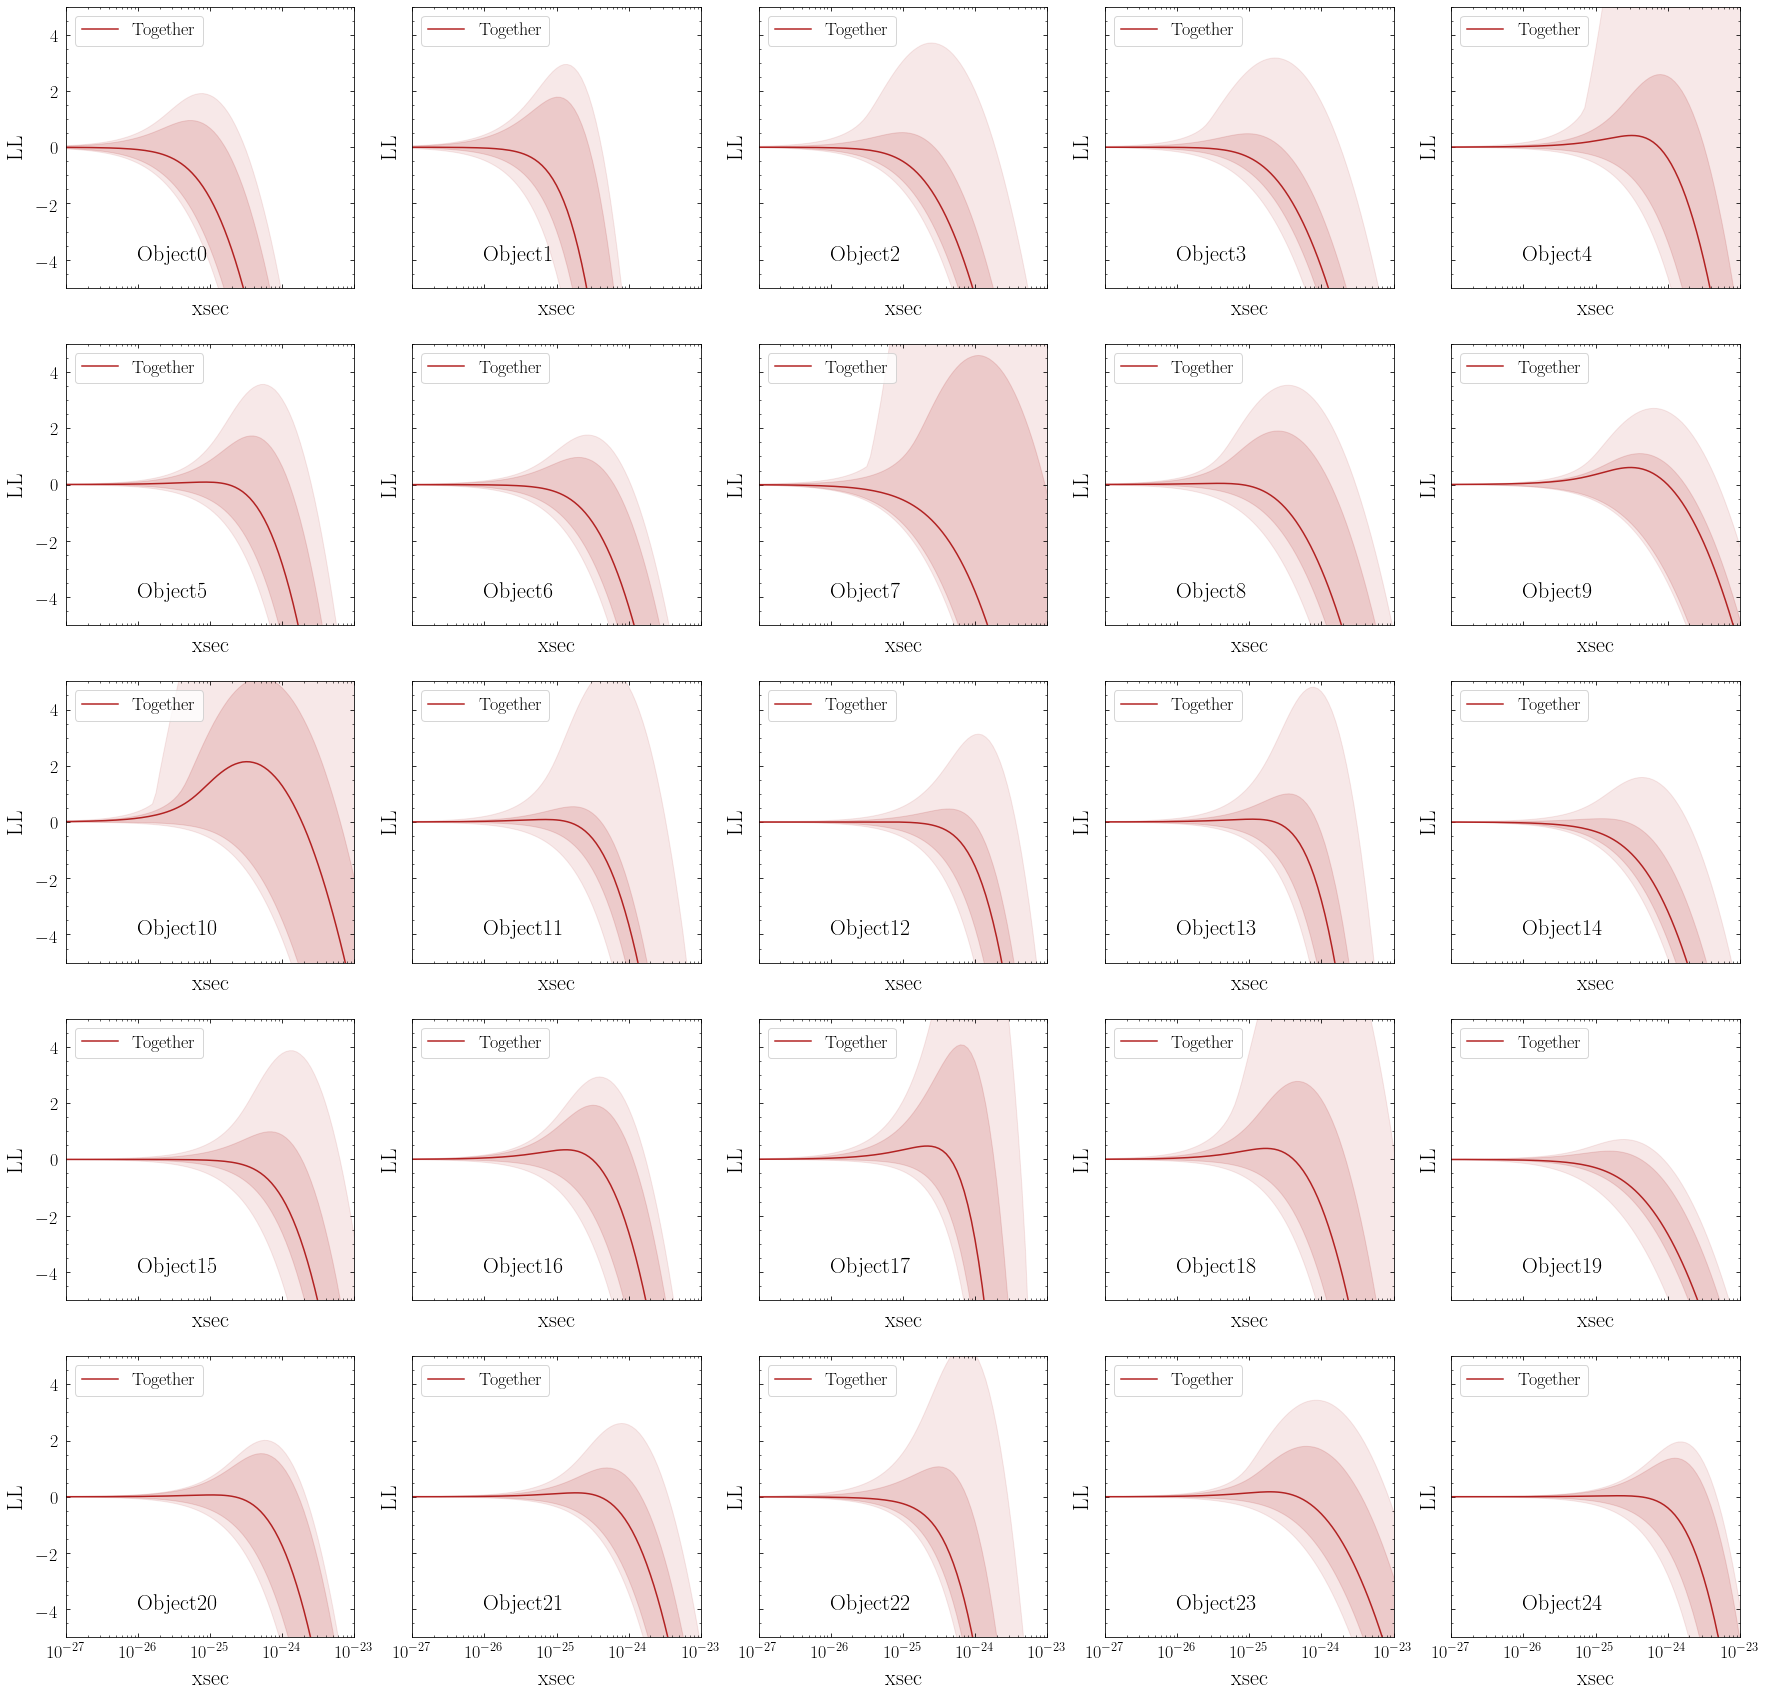

In [11]:
nobj=25
nmc = 20
xsecs = np.logspace(-33,-18,301)

LL2 = np.zeros((nobj,nmc,len(xsecs)))
LL2_indiv = np.zeros((nobj,nmc,len(xsecs)))
LL2_DM = np.zeros((nobj,nmc,len(xsecs)))


for iobj in tqdm_notebook(range(nobj)):
    # Cumulative 
    for imc in (range(nmc)):
        LL2[iobj,imc] = np.load("../data/FloatPS_indiv_floatDM_loc1////LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][0]
        LL2[iobj,imc] -= LL2[iobj,imc,0]
#         LL2_indiv[iobj,imc] = LL2_indiv[iobj-1,imc]  + np.load("data/FloatPS_indiv_noDM///LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][11]
#         LL2_indiv[iobj,imc] -= LL2_indiv[iobj,imc,0]
#         LL2_DM[iobj,imc] = LL2_DM[iobj-1,imc]  + np.load("data/FloatPS_indiv_floatDM//LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][11]
#         LL2_DM[iobj,imc] -= LL2_DM[iobj,imc,0]


ncols=5
nrows=5

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.,30/1.))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i*ncols + j
        cell.fill_between(xsecs,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2[iobj],50,axis=0),color='firebrick',label='Together')

#         cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],2.5,axis=0),np.percentile(LL2_indiv[iobj],97.5,axis=0),color='forestgreen',alpha=0.1)
#         cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],16,axis=0),np.percentile(LL2_indiv[iobj],84,axis=0),color='forestgreen',alpha=0.15)
#         cell.plot(xsecs,np.percentile(LL2_indiv[iobj],50,axis=0),color='forestgreen',label='Indiv')

#         cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],2.5,axis=0),np.percentile(LL2_DM[iobj],97.5,axis=0),color='cornflowerblue',alpha=0.1)
#         cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],16,axis=0),np.percentile(LL2_DM[iobj],84,axis=0),color='cornflowerblue',alpha=0.15)
#         cell.plot(xsecs,np.percentile(LL2_DM[iobj],50,axis=0),color='cornflowerblue',label='Indiv DM')

        cell.legend(loc='upper left')
        cell.set_ylabel("LL")
        cell.set_xlabel("xsec")
        cell.set_xscale("log")
        cell.legend(loc='upper left')
        cell.set_xlim(1e-27,1e-23)
        cell.set_ylim(-5,5)
        cell.text(1e-26,-4,"Object" + str(iobj), fontsize=22)
fig.savefig("Compare.pdf")

5it [00:00, 10.10it/s]


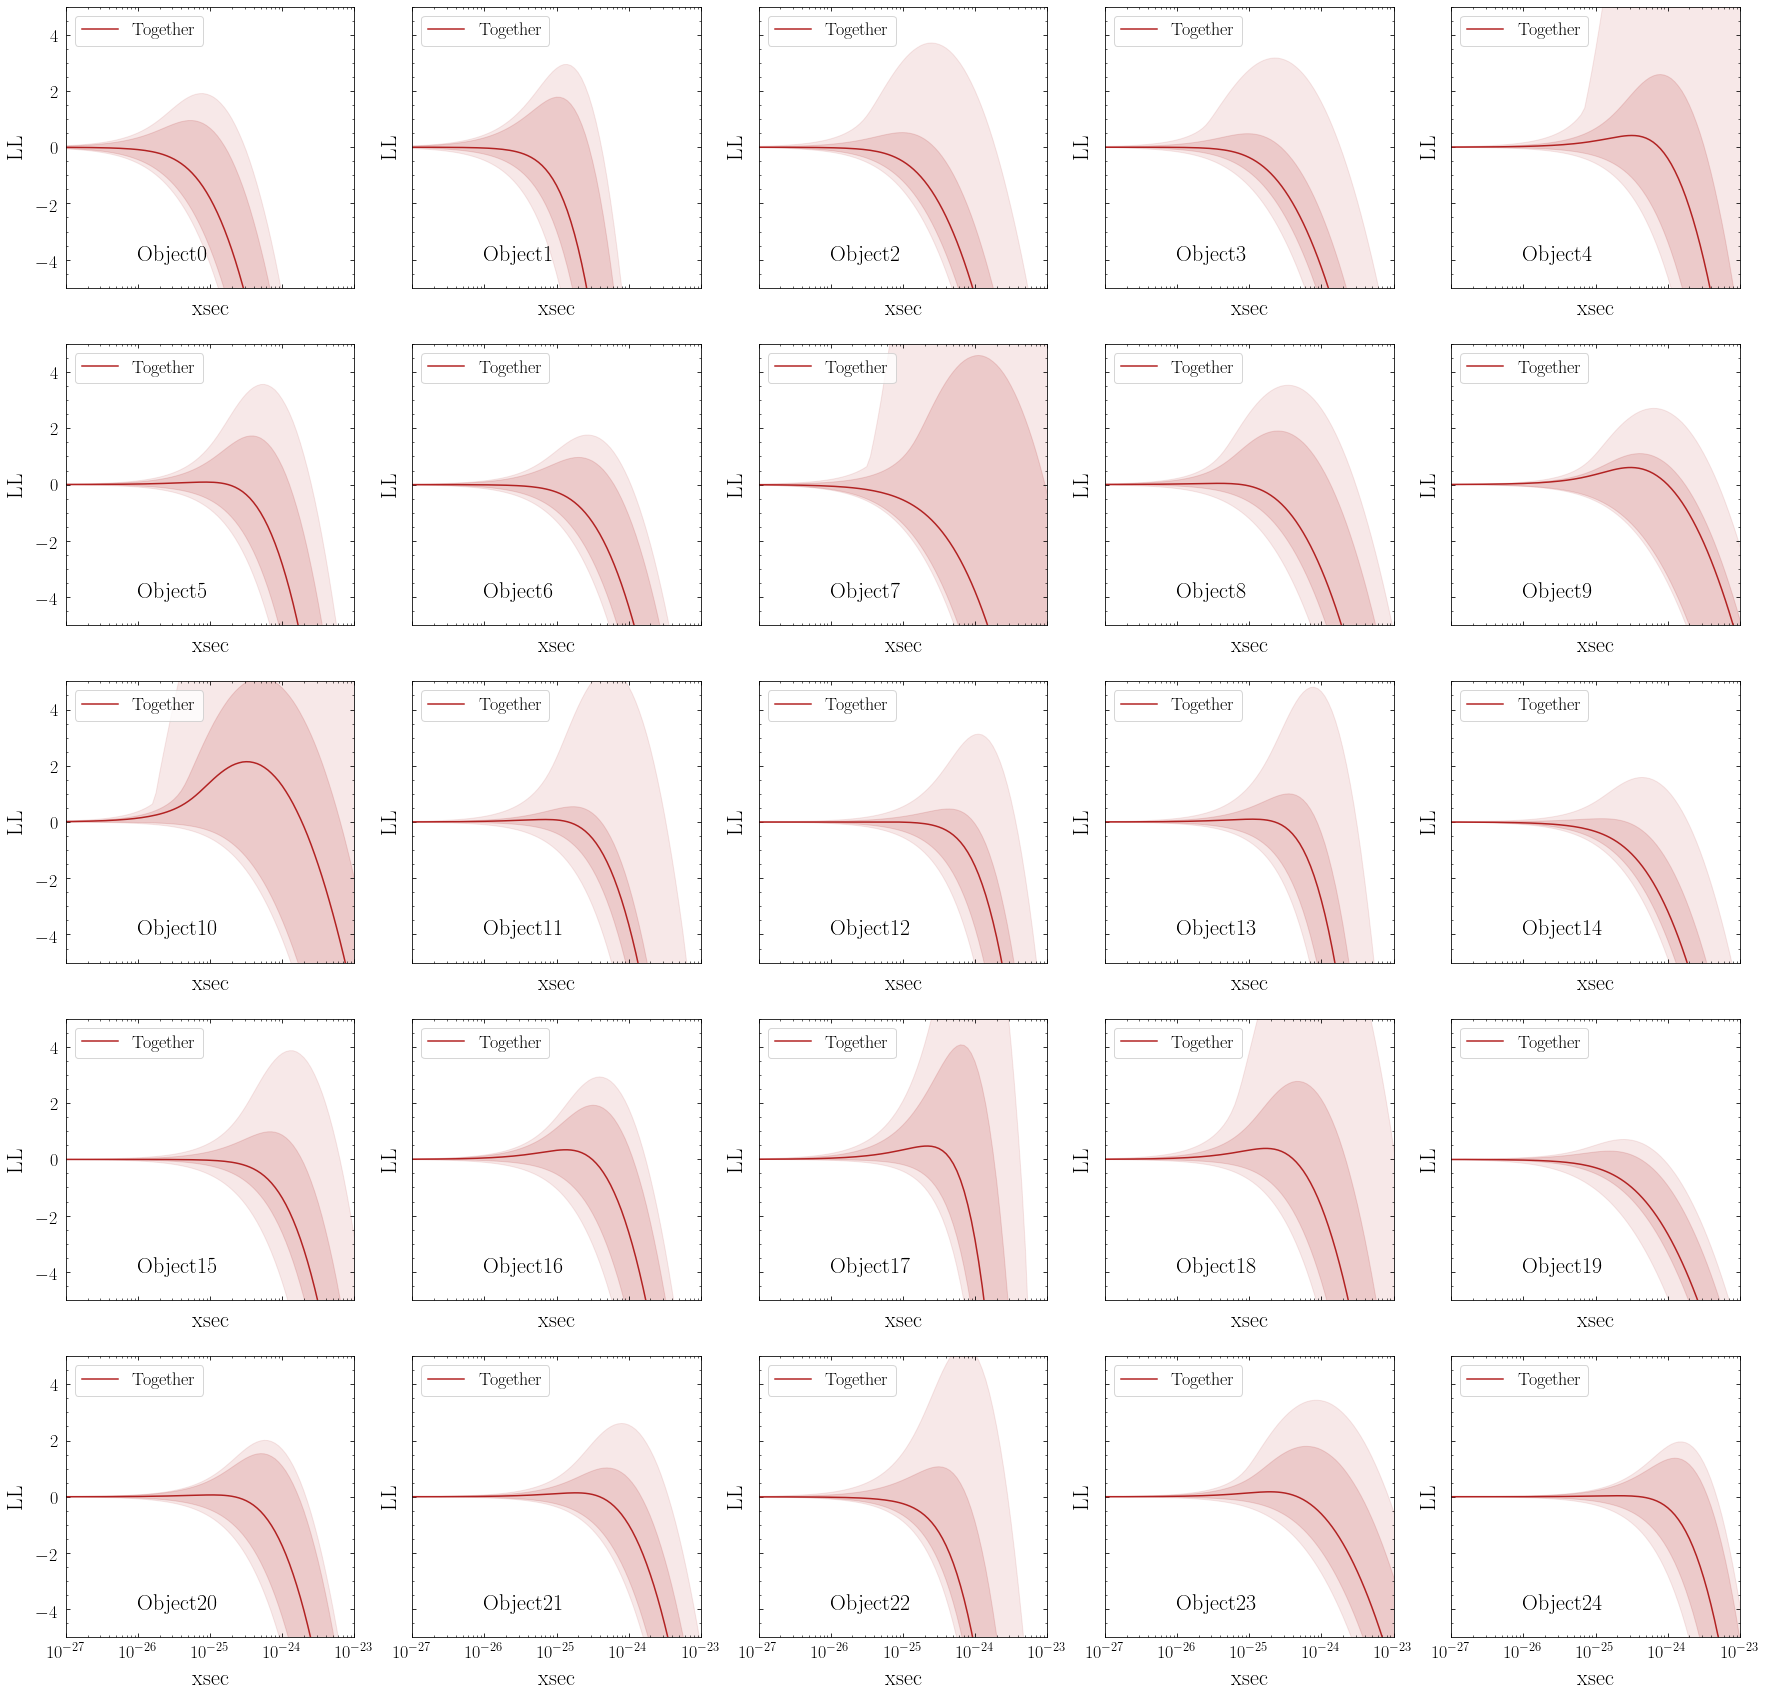

In [77]:
nobj=25
nmc = 20
xsecs = np.logspace(-33,-18,301)

LL2 = np.zeros((nobj,nmc,len(xsecs)))
LL2_indiv = np.zeros((nobj,nmc,len(xsecs)))
LL2_DM = np.zeros((nobj,nmc,len(xsecs)))


for iobj in tqdm_notebook(range(nobj)):
    # Cumulative 
    for imc in (range(nmc)):
        LL2[iobj,imc] = np.load("../data/FloatPS_indiv_floatDM_loc1/LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][0]
        LL2[iobj,imc] -= LL2[iobj,imc,0]
#         LL2_indiv[iobj,imc] = LL2_indiv[iobj-1,imc]  + np.load("data/FloatPS_indiv_noDM///LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][11]
#         LL2_indiv[iobj,imc] -= LL2_indiv[iobj,imc,0]
#         LL2_DM[iobj,imc] = LL2_DM[iobj-1,imc]  + np.load("data/FloatPS_indiv_floatDM//LL2_TSmx_lim_b_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL2'][11]
#         LL2_DM[iobj,imc] -= LL2_DM[iobj,imc,0]


ncols=5
nrows=5

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.,30/1.))

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iobj = i*ncols + j
        cell.fill_between(xsecs,np.percentile(LL2[iobj],2.5,axis=0),np.percentile(LL2[iobj],97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(xsecs,np.percentile(LL2[iobj],16,axis=0),np.percentile(LL2[iobj],84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(xsecs,np.percentile(LL2[iobj],50,axis=0),color='firebrick',label='Together')

#         cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],2.5,axis=0),np.percentile(LL2_indiv[iobj],97.5,axis=0),color='forestgreen',alpha=0.1)
#         cell.fill_between(xsecs,np.percentile(LL2_indiv[iobj],16,axis=0),np.percentile(LL2_indiv[iobj],84,axis=0),color='forestgreen',alpha=0.15)
#         cell.plot(xsecs,np.percentile(LL2_indiv[iobj],50,axis=0),color='forestgreen',label='Indiv')

#         cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],2.5,axis=0),np.percentile(LL2_DM[iobj],97.5,axis=0),color='cornflowerblue',alpha=0.1)
#         cell.fill_between(xsecs,np.percentile(LL2_DM[iobj],16,axis=0),np.percentile(LL2_DM[iobj],84,axis=0),color='cornflowerblue',alpha=0.15)
#         cell.plot(xsecs,np.percentile(LL2_DM[iobj],50,axis=0),color='cornflowerblue',label='Indiv DM')

        cell.legend(loc='upper left')
        cell.set_ylabel("LL")
        cell.set_xlabel("xsec")
        cell.set_xscale("log")
        cell.legend(loc='upper left')
        cell.set_xlim(1e-27,1e-23)
        cell.set_ylim(-5,5)
        cell.text(1e-26,-4,"Object" + str(iobj), fontsize=22)
fig.savefig("Compare.pdf")

In [25]:
catalog_file = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/data/Catalogs/DarkSky_ALL_200,200,200_v3.csv'
catalog = pd.read_csv(catalog_file)

5it [00:01,  3.30it/s]


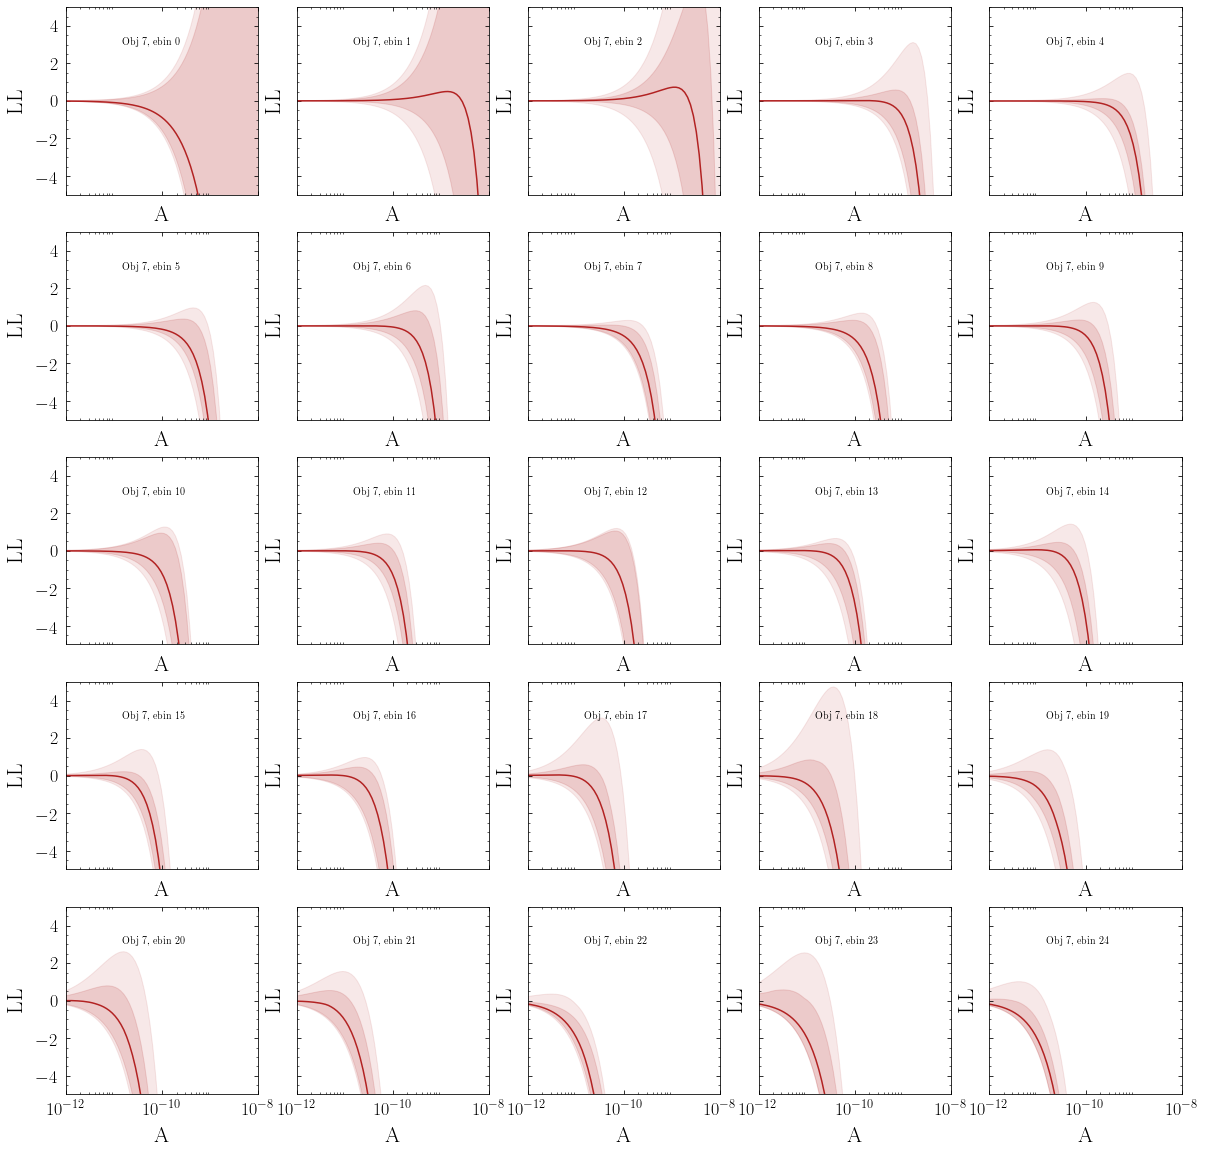

In [78]:
ncols=5
nrows=5
nmc = 20

fig, axes2d = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, sharey=True,
                           figsize=(30/1.5,30/1.5))

iobj = 7

for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        iebin = i*ncols + j
        LL2 = np.zeros((nmc, 200))
        for imc in range(nmc):
            LL2[imc] = np.load("../data/FloatPS_indiv_floatDM_loc1////////LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['LL'][iebin]
            inten = np.load("../data/FloatPS_indiv_floatDM_loc1/LL_inten_o"+str(iobj)+"_mc"+str(imc)+".npz")['intens'][iebin]
            LL2[imc]-= LL2[imc][0]
        
        cell.fill_between(inten,np.percentile(LL2,2.5,axis=0),np.percentile(LL2,97.5,axis=0),color='firebrick',alpha=0.1)
        cell.fill_between(inten,np.percentile(LL2,16,axis=0),np.percentile(LL2,84,axis=0),color='firebrick',alpha=0.15)
        cell.plot(inten,np.percentile(LL2,50,axis=0),color='firebrick')
        cell.set_ylabel("LL")
        cell.set_xlabel("A")
        cell.set_xscale("log")
        cell.set_xlim(1e-12,1e-8)
        cell.text(1.5e-11,3, "Obj " + str(iobj) + ", ebin " + str(iebin))
        cell.set_ylim(-5,5)




In [34]:
catalog[['l','b','N3FGL 5','3FGL 0.5','3FGL 1','3FGL 2','3FGL 5']]

,l,b,N3FGL 5,3FGL 0.5,3FGL 1,3FGL 2,3FGL 5
0,-64.704712,6.791400,4,[],[],[],['3FGL J1223.0-5622' '3FGL J1128.6-5434' '3FGL...
1,-136.568686,-70.197089,5,[],[],[],['3FGL J0238.4-3117' '3FGL J0228.7-3106' '3FGL...
2,16.417404,-30.091858,4,[],[],[],['3FGL J2025.1-2858' '3FGL J2036.8-2830' '3FGL...
3,23.076352,72.321453,2,[],[],[],['3FGL J1427.0+2347' '3FGL J1417.8+2540']
4,46.336464,-3.681863,10,[],['3FGL J1931.1+0937'],['3FGL J1931.1+0937'],['3FGL J1933.4+0727' '3FGL J1910.9+0906' '3FGL...
5,-79.286628,9.240707,6,[],[],[],['3FGL J1033.4-5035' '3FGL J1048.8-5006' '3FGL...
6,115.401350,23.164206,2,[],[],[],['3FGL J2005.2+7752' '3FGL J1935.5+8355']
7,14.917346,-5.561823,7,[],[],[],['3FGL J1833.6-2103' '3FGL J1819.5-2045c' '3FG...
8,-143.949297,43.169542,0,[],[],[],[]
9,-105.236380,-9.125932,4,[],[],['3FGL J0744.8-4028'],['3FGL J0718.7-4319' '3FGL J0744.8-4028' '3FGL...


In [38]:
# Load in the 3FGL catalog 
source_3fg_df = pd.read_csv('../../DataFiles/Catalogs/3fgl.dat', sep='|', comment='#')

In [48]:
catalog = catalog[:100]

In [49]:
# Remove whitespace from column names
source_3fg_df.rename(columns=lambda x: x.strip(), inplace=True)
for col in source_3fg_df.columns.values:
    try:
        source_3fg_df[col] = source_3fg_df[
            col].map(str.strip)
    except TypeError:
        continue

# Convert to numeric data
source_3fg_df = source_3fg_df.convert_objects(
    convert_numeric=True)

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [50]:
from astropy.coordinates import SkyCoord, Distance

from astropy import units as u



In [51]:
# Astropy-formatted coordinates of cluster and 3FGL
c2 = SkyCoord("galactic", l=catalog['l']*u.deg, b=catalog['b']*u.deg)
c3 = SkyCoord("galactic", l=source_3fg_df['_Lii']*u.deg, b=source_3fg_df['_Bii']*u.deg)

In [53]:
# Select 3FGL sources within some radius

threefgl0p5deg = []

idx3fgl, idx2mass, d2d, _ = c2.search_around_sky(c3, .5*u.deg)
for i in range(len(catalog)):
    threefgl0p5deg.append(source_3fg_df['name'][idx3fgl[idx2mass == i]].values)

threefgl1deg = []

idx3fgl, idx2mass, d2d, _ = c2.search_around_sky(c3, 1*u.deg)
for i in range(len(catalog)):
    threefgl1deg.append(source_3fg_df['name'][idx3fgl[idx2mass == i]].values)

threefgl2deg = []

idx3fgl, idx2mass, d2d, _ = c2.search_around_sky(c3, 2*u.deg)
for i in range(len(catalog)):
    threefgl2deg.append(source_3fg_df['name'][idx3fgl[idx2mass == i]].values)
    
threefgl5deg = []

idx3fgl, idx2mass, d2d, _ = c2.search_around_sky(c3, 5*u.deg)
for i in range(len(catalog)):
    threefgl5deg.append(source_3fg_df['name'][idx3fgl[idx2mass == i]].values)
    
threefgl10deg = []
    
idx3fgl, idx2mass, d2d, _ = c2.search_around_sky(c3, 10*u.deg)
for i in range(len(catalog)):
    threefgl10deg.append(source_3fg_df['name'][idx3fgl[idx2mass == i]].values)

In [54]:
threefgl10deg

[array(['3FGL J1123.2-6415', '3FGL J1212.2-6251', '3FGL J1139.0-6244',
        '3FGL J1203.9-6243', '3FGL J1208.4-6239', '3FGL J1214.0-6236',
        '3FGL J1128.7-6232', '3FGL J1244.2-6227', '3FGL J1236.5-6154',
        '3FGL J1112.0-6135', '3FGL J1119.1-6127', '3FGL J1105.2-6113',
        '3FGL J1151.8-6108', '3FGL J1058.5-6106c', '3FGL J1111.9-6058',
        '3FGL J1135.2-6054', '3FGL J1101.9-6053', '3FGL J1111.9-6038',
        '3FGL J1104.9-6036', '3FGL J1101.3-6032', '3FGL J1055.8-6025',
        '3FGL J1125.6-6012', '3FGL J1054.7-6006', '3FGL J1256.1-5919',
        '3FGL J1124.5-5915', '3FGL J1056.7-5853', '3FGL J1125.3-5824',
        '3FGL J1125.1-5803', '3FGL J1233.9-5736', '3FGL J1256.1-5703',
        '3FGL J1223.0-5622', '3FGL J1304.3-5535', '3FGL J1244.3-5515',
        '3FGL J1128.6-5434', '3FGL J1103.9-5357', '3FGL J1117.2-5338',
        '3FGL J1229.8-5305', '3FGL J1057.9-5227', '3FGL J1209.1-5224',
        '3FGL J1231.6-5113', '3FGL J1207.2-5052', '3FGL J1126.8-5001',
     

In [55]:
pd.Series([len(x) for x in threefgl10deg], index=catalog.index)

0     50
1     14
2     14
3     17
4     34
5     31
6     21
7     50
8     11
9     28
10    22
11    10
12    27
13    11
14    16
15    29
16    21
17    15
18    14
19    11
20    12
21    28
22    14
23    15
24    38
25    12
26    43
27    27
28    18
29    19
      ..
70    38
71    29
72    27
73    18
74    47
75    20
76    24
77    30
78    25
79    17
80    16
81    32
82    60
83    21
84    16
85    23
86    16
87    17
88    15
89    17
90    73
91    17
92    22
93    24
94    26
95    17
96    13
97    28
98    19
99    19
dtype: int64